In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("placement.csv")

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape

(100, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [6]:
df.describe()

,Unnamed: 0,cgpa,iq,placement
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,5.991000,123.580000,0.500000
std,29.011492,1.143634,39.944198,0.502519
min,0.000000,3.300000,37.000000,0.000000
25%,24.750000,5.075000,101.500000,0.000000
50%,49.500000,6.000000,127.500000,0.500000
75%,74.250000,6.900000,149.000000,1.000000
max,99.000000,8.500000,233.000000,1.000000


In [7]:
df.isnull().sum()

Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64

In [8]:
df.value_counts("placement")

placement
0    50
1    50
dtype: int64

<img src="output-onlinetexttools.png" width="500"/>

In [9]:
df.head(1)

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1


In [10]:
x = df.iloc[:,1:]

In [11]:
# df.drop(columns="Unnamed: 0")

In [12]:
y = df.iloc[:,-1]

In [13]:
x.head(1)

,cgpa,iq,placement
0,6.8,123.0,1


In [14]:
y.head(1)

0    1
Name: placement, dtype: int64

In [15]:
import matplotlib.pyplot as plt

In [16]:
print(x.shape)
print(y.shape)

(100, 3)
(100,)


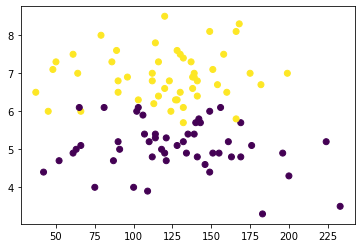

In [17]:
plt.scatter(df["iq"],df["cgpa"],c=df["placement"])

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [20]:
X_train.head()

,cgpa,iq,placement
40,4.9,134.0,0
91,7.5,158.0,1
30,7.6,128.0,1
31,3.9,109.0,0
84,5.7,169.0,0


In [21]:
y_train.head()

40    0
91    1
30    1
31    0
84    0
Name: placement, dtype: int64

# Scale the values 

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc = StandardScaler()

In [24]:
X_train = sc.fit_transform(X_train)

# We tarined our model in small values so we only scale the values of X_train and X_test, no need to scale the values of output

In [25]:
X_train

array([[-0.92973029,  0.29662105, -0.97801929],
       [ 1.30850929,  0.88821981,  1.02247472],
       [ 1.39459543,  0.14872136,  1.02247472],
       [-1.79059166, -0.31962767, -0.97801929],
       [-0.24104119,  1.15936924, -0.97801929],
       [ 2.16937067, -0.04847823,  1.02247472],
       [-0.84364415, -0.76332674, -0.97801929],
       [ 0.79199247, -0.640077  ,  1.02247472],
       [-0.84364415, -0.09777813, -0.97801929],
       [-1.70450553, -0.5414772 , -0.97801929],
       [ 1.73893998, -1.05912612,  1.02247472],
       [-0.67147187, -0.29497772, -0.97801929],
       [-1.36016097, -1.97117421, -0.97801929],
       [-0.75755801,  0.14872136, -0.97801929],
       [ 0.10330337,  0.24732115,  1.02247472],
       [ 0.44764792,  0.93751971,  1.02247472],
       [ 0.79199247,  0.39522084,  1.02247472],
       [-0.92973029, -0.04847823, -0.97801929],
       [ 0.10330337, -0.46752736, -0.97801929],
       [ 0.27547564,  0.14872136,  1.02247472],
       [-0.15495505,  0.49382063, -0.978

In [26]:
X_train.shape

(90, 3)

In [27]:
# Only transfrom because pattern is already fit
X_test= sc.transform(X_test)

In [28]:
X_test

array([[-0.67147187,  0.96216966, -0.97801929],
       [-1.10190256, -0.02382828, -0.97801929],
       [ 1.30850929,  0.19802125,  1.02247472],
       [ 0.8780786 ,  1.8988677 ,  1.02247472],
       [ 0.61982019,  0.78962002,  1.02247472],
       [-0.58538574, -0.02382828, -0.97801929],
       [ 0.70590633, -0.78797669,  1.02247472],
       [ 0.53373405,  0.39522084,  1.02247472],
       [-0.24104119,  0.24732115,  1.02247472],
       [-0.4992996 ,  0.321271  , -0.97801929]])

In [29]:
X_test.shape

(10, 3)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model  = LogisticRegression()

In [32]:
model.fit(X_train,y_train)

LogisticRegression()

In [33]:
y_pred = model.predict(X_test)

In [34]:
y_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 0])

In [35]:
y_test

47    0
24    0
83    1
26    1
74    1
2     0
35    1
48    1
87    1
49    0
Name: placement, dtype: int64

In [36]:
# Evaluate the model

In [37]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test,y_pred)

1.0

# This is the greate example of model overfitting accuracy is 100 so something in data collecting problem may be data is not proper way 

# Create a decision tree

In [41]:
from mlxtend.plotting import plot_decision_regions

ValueError: Filler values must be provided when X has more than 2 training features.

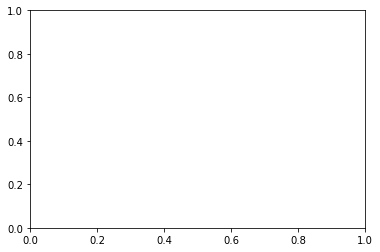

In [72]:
plot_decision_regions(X_train,y_train.values,clf=model,)

In [70]:
import pickle

In [71]:
pickle.dump(model,open("model.pkl","wb"))